<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/FirstOrderOrdinaryDiferencialEquations1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Methods For First Order EDO**
# *   Explicit Euler
# *   Improved Euler
# *   Runge-Kutta of 4th Order
# *   Implicit (or Backward) Euler
# *   Runge-Kutta
# *   Explicit Multistep of Adams-Bashforth (with 2 steps, 4 steps,...)

# **Problem Description**
# EDO: y' = f(x, y), x0 <= x <= xn
# Initial Condition: y(x0) = y0
# Where, f(x,y), x0, xn and y0 are given
## **Obs.**
* the Discretization Parameter, h, is given
* for Implicit Euler, the expresson of y[i+1] must be given

In [ ]:
import math

# Problem definition
problem3 = {'name':'problem3',
            'f': lambda x, y: -20*y + 20*x**2 + 2*x,
            'x0': 0,
            'xn': 1,
            'y0': 1,
            'fa': lambda x: math.exp(-20*x) + x**2,
            'h': 0.1,
            'yip1': lambda x, y, h: (y + h*(20*(x + h)**2 + 2*(x + h)))/(1 + 20*h)}

problem1 = {'name':'problem1',
            'f': lambda x, y: x + y,
            'x0': 0,
            'xn': 1,
            'y0': 0,
            'fa': lambda x: -x + math.exp(x) - 1,
            'h': 0.1,
            'yip1': lambda x, y, h: (y + h*(x + h))/(1 - h)}

In [ ]:
from sympy import *
u, x, y, h = symbols('u x y h')

yip1 = solve(y + h*((u - (x + h) - 1)**2 + 2) - u, u)
print('yip1 = ', yip1)

yip1 =  [h + x + 1 - sqrt(-4*h**2 + 4*h*x - 4*h*y + 4*h + 1)/(2*h) + 1/(2*h), h + x + 1 + sqrt(-4*h**2 + 4*h*x - 4*h*y + 4*h + 1)/(2*h) + 1/(2*h)]


In [ ]:
import math

problem21 = {'name':'problem2',
            'f': lambda x, y: (y - x - 1)**2 + 2,
            'x0': 0,
            'xn': 0.4,
            'y0': 1,
            'fa': lambda x: x + math.tan(x) + 1,
            'h': 0.1,
            'yip1': lambda x, y, h: h + x + 1 - math.sqrt(-4*h**2 + 4*h*x - 4*h*y + 4*h + 1)/(2*h) + 1/(2*h)}

# the following block is commented using the multiline comment syntax of python
dummy = ''''
problem22 = {'name':'problem2',
            'f': lambda x, y: (y - x - 1)**2 + 2,
            'x0': 0,
            'xn': 0.4,
            'y0': 1,
            'fa': lambda x: x + math.tan(x) + 1,
            'h': 0.01,
            'yip1': lambda x, y, h: h + x + 1 + math.sqrt(-4*h**2 + 4*h*x - 4*h*y + 4*h + 1)/(2*h) + 1/(2*h)}
'''

In [ ]:
# Selecting the problem to be solved
problem = problem21

In [ ]:
import inspect
def explicitEulerAlg(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  x = x0
  y = y0

  # Initialization of Variables Saving Containers
  X = []
  Y = []

  n = int((xn - x0)/h)
  for i in range(n + 1):
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving
    X += [x]
    Y += [y]

    # Variables Updating
    y += h*f(x, y)
    x += h

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
import inspect
def improvedEulerAlg(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  x = x0
  y = y0

  # Initialization of Variables Saving Containers
  X = []
  Y = []

  n = int((xn - x0)/h)
  for i in range(n + 1):
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving
    X += [x]
    Y += [y]

    # Variables Updating
    k1 = h*f(x, y)
    k2 = h*f(x + h, y + k1)
    y += (k1 + k2)/2.
    x += h

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
import inspect
def rungeKuttaAlg(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  x = x0
  y = y0

  # Initialization of Variables Saving Containers
  X = []
  Y = []

  n = int((xn - x0)/h)
  for i in range(n + 1):
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving
    X += [x]
    Y += [y]

    # Variables Updating
    k1 = h*f(x, y)
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
import inspect
def implicitEulerAlg(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  yip1 = problem['yip1']

  # Variables Initialization
  x = x0
  y = y0

  # Initialization of Variables Saving Containers
  X = []
  Y = []

  n = int((xn - x0)/h)
  for i in range(n + 1):
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving
    X += [x]
    Y += [y]

    # Variables Updating
    y = yip1(x, y, h)
    x += h

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
import inspect
# page 283, Richard L. Burden, Análise Numérica
def adamsBashforth2StepsAlg(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  i = 0
  x = x0
  y = y0

  # Variables Saving for x0 and y0
  X = [x0]
  Y = [y0]
  #print('i = ', i, ', x = %.2f' % X[-1], ', y = %.4f' % Y[-1])

  stepsNbr = 2
  for i in range(1, stepsNbr):
    # Variables Updating: computing y1 using Runge-Kutta4 method
    k1 = h*f(x, y)
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h

    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving for xi and yi, for i = 1
    X += [x]
    Y += [y]

  n = int((xn - x0)/h)
  for i in range(stepsNbr, n + 1):
    # Variables Updating: computing yi for i = 2,3,...,n
    y += (3*f(X[-1], Y[-1]) - f(X[-2], Y[-2]))*h/2.
    x += h

    # Variables Saving for xi and yi
    X += [x]
    Y += [y]
    #print('i = ', i, ', x = %.2f' % X[-1], ', y = %.4f' % Y[-1])

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
import inspect
def adamsBashforth3StepsAlg(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  i = 0
  x = x0
  y = y0

  # Variables Saving for x0 and y0
  X = [x0]
  Y = [y0]
  #print('i = ', i, ', x = %.2f' % X[-1], ', y = %.4f' % Y[-1])

  stepsNbr = 3
  for i in range(1, stepsNbr): #i=1,2
    # Variables Updating: computing y1 using Runge-Kutta4 method
    k1 = h*f(x, y)
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h

    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving for xi and yi, for i = 1
    X += [x]
    Y += [y]

  # X = [x0, x1, x2]
  # Y = [y0, y1, y2]
  n = int((xn - x0)/h)
  for i in range(stepsNbr, n + 1):
    # Variables Updating: computing yi for i = 2,3,...,n
    y += (23*f(X[-1], Y[-1]) - 16*f(X[-2], Y[-2]) + 5*f(X[-2], Y[-2]))*h/12.
    x += h

    # Variables Saving for xi and yi
    X += [x]
    Y += [y]
    #print('i = ', i, ', x = %.2f' % X[-1], ', y = %.4f' % Y[-1])

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
import inspect
def adamsBashforth5StepsAlg(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  i = 0
  x = x0
  y = y0

  # Variables Saving for x0 and y0
  X = [x0]
  Y = [y0]
  #print('i = ', i, ', x = %.2f' % X[-1], ', y = %.4f' % Y[-1])

  stepsNbr = 5
  for i in range(1, stepsNbr):
    # Variables Updating: computing y1 using Runge-Kutta4 method
    k1 = h*f(x, y)
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h

    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving for xi and yi, for i = 1
    X += [x]
    Y += [y]

  n = int((xn - x0)/h)
  for i in range(stepsNbr, n + 1):
    # Variables Updating: computing yi for i = 2,3,...,n
    y += (  1901*f(X[-1], Y[-1]) \
          - 2774*f(X[-2], Y[-2]) \
          + 2616*f(X[-2], Y[-2]) \
          - 1274*f(X[-2], Y[-2]) \
          +  251*f(X[-2], Y[-2]) )*h/720.
    x += h

    # Variables Saving for xi and yi
    X += [x]
    Y += [y]
    #print('i = ', i, ', x = %.2f' % X[-1], ', y = %.4f' % Y[-1])

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
# Solving
import pandas as pd
df = pd.DataFrame({})

df['X'], df['Explicit Euler'] = explicitEulerAlg(problem)
_      , df['Improved Euler'] = improvedEulerAlg(problem)
_      , df['Runge-Kutta4'] = rungeKuttaAlg(problem)
_      , df['Implicit Euler'] = implicitEulerAlg(problem)
_      , df['AdamsBashforth2Steps'] = adamsBashforth2StepsAlg(problem)
_      , df['AdamsBashforth3Steps'] = adamsBashforth3StepsAlg(problem)
_      , df['AdamsBashforth5Steps'] = adamsBashforth5StepsAlg(problem)

explicitEulerAlg is done solving problem2
improvedEulerAlg is done solving problem2
rungeKuttaAlg is done solving problem2
implicitEulerAlg is done solving problem2
adamsBashforth2StepsAlg is done solving problem2
adamsBashforth3StepsAlg is done solving problem2
adamsBashforth5StepsAlg is done solving problem2


In [ ]:
# Setting diplay options
pd.options.display.float_format = '{:,.10f}'.format
df['X'] = df['X'].map('{:,.1f}'.format)
display(df)

,X,Explicit Euler,Improved Euler,Runge-Kutta4,Implicit Euler,AdamsBashforth2Steps,AdamsBashforth3Steps,AdamsBashforth5Steps
0,0.0,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000
1,0.1,1.2000000000,1.2005000000,1.2003345891,1.2010205144,1.2003345891,1.2003345891,1.2003345891
2,0.2,1.4010000000,1.4030353270,1.4027098782,1.4052325546,1.4018446435,1.4027098782,1.4027098782
3,0.3,1.6050401000,1.6098137857,1.6093360393,1.6151654827,1.6074524811,1.6096628987,1.6093360393
4,0.4,1.8143450463,1.8234083463,1.8227929929,1.8340011856,1.8195944723,1.8242753262,1.8227929929


In [ ]:
# Evaluating the Analytical Solution at the xi, i = 1,2,...
df['Ya'] = [problem['fa'](float(x)) for x in df['X']]
display(df)

,X,Explicit Euler,Improved Euler,Runge-Kutta4,Implicit Euler,AdamsBashforth2Steps,AdamsBashforth3Steps,AdamsBashforth5Steps,Ya
0,0.0,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000
1,0.1,1.2000000000,1.2005000000,1.2003345891,1.2010205144,1.2003345891,1.2003345891,1.2003345891,1.2003346721
2,0.2,1.4010000000,1.4030353270,1.4027098782,1.4052325546,1.4018446435,1.4027098782,1.4027098782,1.4027100355
3,0.3,1.6050401000,1.6098137857,1.6093360393,1.6151654827,1.6074524811,1.6096628987,1.6093360393,1.6093362496
4,0.4,1.8143450463,1.8234083463,1.8227929929,1.8340011856,1.8195944723,1.8242753262,1.8227929929,1.8227932187


In [ ]:
# Preparing the plotResults function
import matplotlib.pyplot as plt

def plotResults(df, x, y):
  # Making the plot
  ax = df.plot(x = x,
               y = y,
               markersize = 12,
               markerfacecolor='none',
               linestyle='dashed',
               figsize = (14, 8))

  # Setting plot style
  color = ['red','black', 'blue', 'green', 'brown', 'purple', 'olive', 'darkgreen']
  marker = ['s','o', 'd', 'P', '>', 'X', '|', 'D']
  handles = []
  for i, line in enumerate(ax.get_lines()):
    line.set_color(color[i])
    line.set_marker(marker[i])
    handles.append(line)

  # Setting the legend
  ax.legend(handles = handles, fontsize = 18, bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.tight_layout()

  # Showing the plot
  plt.show()

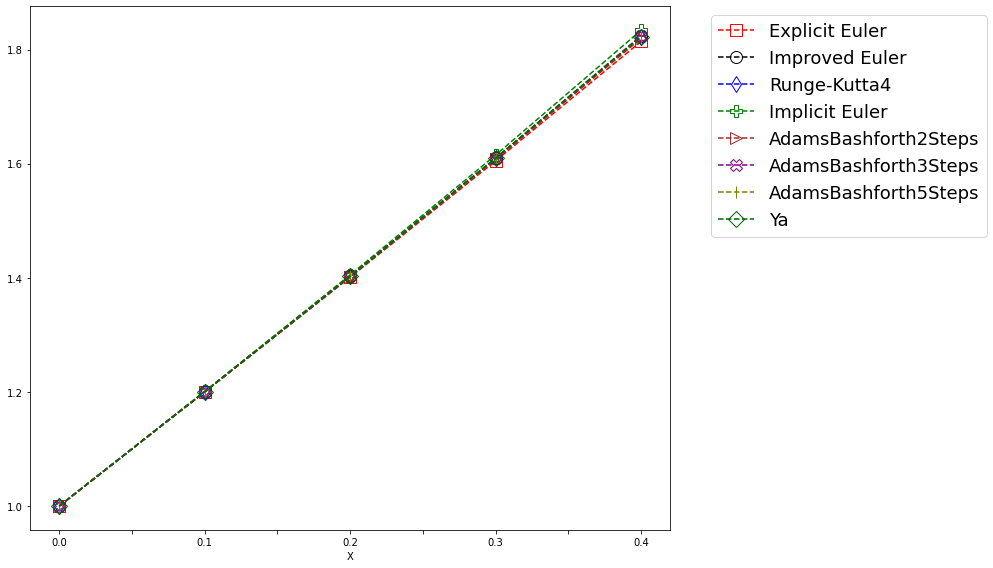

In [ ]:
# Ploting the solutions
plotResults(df, x = 'X', y = ['Explicit Euler',
                              'Improved Euler',
                              'Runge-Kutta4',
                              'Implicit Euler',
                              'AdamsBashforth2Steps',
                              'AdamsBashforth3Steps',
                              'AdamsBashforth5Steps',
                              'Ya'])

In [ ]:
# Computing the absolute errors
maxAbsoluteError = 0
for columnName in df[['Explicit Euler',
                      'Improved Euler',
                      'Runge-Kutta4',
                      'Implicit Euler',
                      'AdamsBashforth2Steps',
                      'AdamsBashforth3Steps',
                      'AdamsBashforth5Steps']]:
  column = (df[columnName] - df['Ya']).abs()
  df['absErr('+columnName+')'] = column

  value = df['absErr('+columnName+')'].max()
  if maxAbsoluteError < value:
    maxAbsoluteError = value
    maxAbsoluteErrorColumnName = 'absErr('+columnName+')'

print('maxAbsoluteError = ', maxAbsoluteError, ', maxAbsoluteErrorColumnName = ', maxAbsoluteErrorColumnName)
display(df)

maxAbsoluteError =  0.011207966905898648 , maxAbsoluteErrorColumnName =  absErr(Implicit Euler)


,X,Explicit Euler,Improved Euler,Runge-Kutta4,Implicit Euler,AdamsBashforth2Steps,AdamsBashforth3Steps,AdamsBashforth5Steps,Ya,absErr(Explicit Euler),absErr(Improved Euler),absErr(Runge-Kutta4),absErr(Implicit Euler),absErr(AdamsBashforth2Steps),absErr(AdamsBashforth3Steps),absErr(AdamsBashforth5Steps)
0,0.0,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
1,0.1,1.2000000000,1.2005000000,1.2003345891,1.2010205144,1.2003345891,1.2003345891,1.2003345891,1.2003346721,0.0003346721,0.0001653279,0.0000000830,0.0006858423,0.0000000830,0.0000000830,0.0000000830
2,0.2,1.4010000000,1.4030353270,1.4027098782,1.4052325546,1.4018446435,1.4027098782,1.4027098782,1.4027100355,0.0017100355,0.0003252915,0.0000001573,0.0025225191,0.0008653920,0.0000001573,0.0000001573
3,0.3,1.6050401000,1.6098137857,1.6093360393,1.6151654827,1.6074524811,1.6096628987,1.6093360393,1.6093362496,0.0042961496,0.0004775360,0.0000002103,0.0058292331,0.0018837685,0.0003266491,0.0000002103
4,0.4,1.8143450463,1.8234083463,1.8227929929,1.8340011856,1.8195944723,1.8242753262,1.8227929929,1.8227932187,0.0084481725,0.0006151275,0.0000002259,0.0112079669,0.0031987465,0.0014821075,0.0000002259


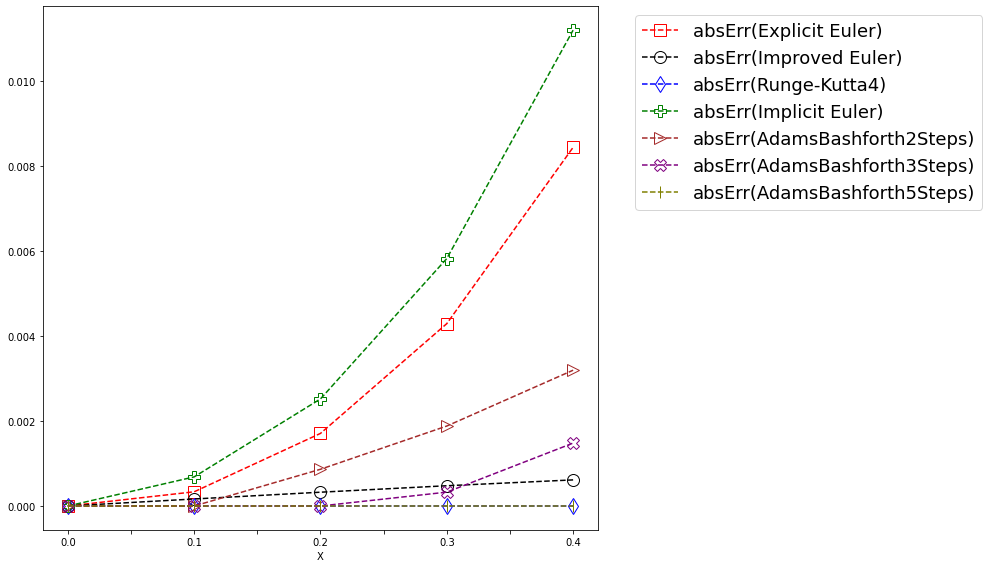

In [ ]:
# Ploting the absolute errors
plotResults(df, x = 'X', y = ['absErr(Explicit Euler)',
                              'absErr(Improved Euler)',
                              'absErr(Runge-Kutta4)',
                              'absErr(Implicit Euler)',
                              'absErr(AdamsBashforth2Steps)',
                              'absErr(AdamsBashforth3Steps)',
                              'absErr(AdamsBashforth5Steps)'])

In [ ]:
# Computin the relative errors
maxRelativeError = 0
for columnName in df[['Explicit Euler',
                      'Improved Euler',
                      'Runge-Kutta4',
                      'Implicit Euler',
                      'AdamsBashforth2Steps',
                      'AdamsBashforth3Steps',
                      'AdamsBashforth5Steps']]:
  column = df.apply(lambda x: (x[columnName] - x['Ya'])/x['Ya'] if x['Ya'] != 0
                    else x[columnName], axis = 1)
  df['relErr('+columnName+')'] = column

  value = column.max()
  if maxRelativeError < value:
    maxRelativeError = value
    maxRelativeErrorColumnName = 'relErr('+columnName+')'

print('maxRelativeError = ', maxRelativeError, ', maxRelativeErrorColumnName = ', maxRelativeErrorColumnName)
display(df)

maxRelativeError =  0.006148786812833012 , maxRelativeErrorColumnName =  relErr(Implicit Euler)


,X,Explicit Euler,Improved Euler,Runge-Kutta4,Implicit Euler,AdamsBashforth2Steps,AdamsBashforth3Steps,AdamsBashforth5Steps,Ya,absErr(Explicit Euler),...,absErr(AdamsBashforth2Steps),absErr(AdamsBashforth3Steps),absErr(AdamsBashforth5Steps),relErr(Explicit Euler),relErr(Improved Euler),relErr(Runge-Kutta4),relErr(Implicit Euler),relErr(AdamsBashforth2Steps),relErr(AdamsBashforth3Steps),relErr(AdamsBashforth5Steps)
0,0.0,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
1,0.1,1.2000000000,1.2005000000,1.2003345891,1.2010205144,1.2003345891,1.2003345891,1.2003345891,1.2003346721,0.0003346721,...,0.0000000830,0.0000000830,0.0000000830,-0.0002788156,0.0001377348,-0.0000000692,0.0005713759,-0.0000000692,-0.0000000692,-0.0000000692
2,0.2,1.4010000000,1.4030353270,1.4027098782,1.4052325546,1.4018446435,1.4027098782,1.4027098782,1.4027100355,0.0017100355,...,0.0008653920,0.0000001573,0.0000001573,-0.0012190941,0.0002319022,-0.0000001121,0.0017983183,-0.0006169429,-0.0000001121,-0.0000001121
3,0.3,1.6050401000,1.6098137857,1.6093360393,1.6151654827,1.6074524811,1.6096628987,1.6093360393,1.6093362496,0.0042961496,...,0.0018837685,0.0003266491,0.0000002103,-0.0026695165,0.0002967286,-0.0000001307,0.0036221350,-0.0011705251,0.0002029713,-0.0000001307
4,0.4,1.8143450463,1.8234083463,1.8227929929,1.8340011856,1.8195944723,1.8242753262,1.8227929929,1.8227932187,0.0084481725,...,0.0031987465,0.0014821075,0.0000002259,-0.0046347399,0.0003374642,-0.0000001239,0.0061487868,-0.0017548598,0.0008130969,-0.0000001239


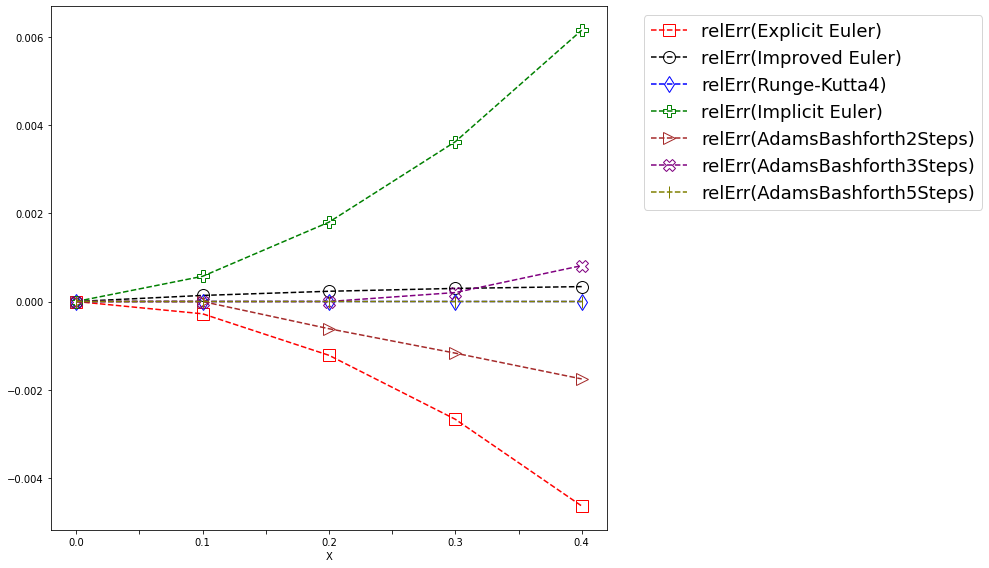

In [ ]:
# Ploting the relative errors
plotResults(df, x = 'X', y = ['relErr(Explicit Euler)',
                              'relErr(Improved Euler)',
                              'relErr(Runge-Kutta4)',
                              'relErr(Implicit Euler)',
                              'relErr(AdamsBashforth2Steps)',
                              'relErr(AdamsBashforth3Steps)',
                              'relErr(AdamsBashforth5Steps)'])